# ❤️Heart Attack Prediction

<center>
<img src="https://www.yashodahealthcare.com/blogs/wp-content/uploads/2024/01/WhatsApp-Image-2024-01-20-at-16.23.47.jpeg" width=1000 height=500>
</center>

**Table of Contents**
1. [Introduction](#introduction)
   -  [Data Dictionary](#dictionary)
   -  [Task](#task)
2. [Preparation](#preparation)
   -  [Importing Packages](#importing-packages)
   -  [Importing Data](#importing-data)
3. [EDA](#eda)
   -  [Data Exploration](#data-exploration)
   -  [Data Visualization](#data-visualization)
4. [Data Preprocessing](#data-preprocessing)
   -  [Packages](#preprocessing-packages)
   -  [Feature Scaling](#feature-scaling)
   -  [Splitting data](#train-test-split)
5. [Modeling](#modeling)
   -  [Linear Classifiers](#linear-classifiers)
   -  [Support Vector Machine](#svm)
   -  [Logistic Regression](#logreg)
   -  [Tree-based Classifiers](#tree-based)
   -  [Decision Tree](#dt)
   -  [Random Forest](#rf)
   -  [AdaBoost](#adaboost)
6. [Save Model](#save-model)

## 1. Introduction <a id="introduction"></a>


### 1.1 Data Dictionary <a id="dictionary"></a>


<a id=2></a>
`age` - Age of the patient

`sex` - Sex of the patient

`cp` - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

`trtbps` - Resting blood pressure (in mm Hg)

`chol` - Cholestoral in mg/dl fetched via BMI sensor

`fbs` - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

`restecg` - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

`thalachh`  - Maximum heart rate achieved

`oldpeak` - Previous peak

`slp` - Slope

`caa` - Number of major vessels 

`thall` - Thalium Stress Test result ~ (0,3)

`exng` - Exercise induced angina ~ 1 = Yes, 0 = No

`output` - Target variable

### 1.2 Task <a id="task"></a>
Our task is to perform EDA and build a model to predict if a person is likely to have an upcoming heart attack or not

## 2. Preparation <a id="preparation"></a>


### 2.1 Importing Packages <a id="importing-packages"></a>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od 

### 2.2 Importing Data <a id="importing-data"></a>


In [2]:
od.download("https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset")

Skipping, found downloaded files in ".\heart-attack-analysis-prediction-dataset" (use force=True to force download)


In [3]:
data = pd.read_csv("heart-attack-analysis-prediction-dataset/heart.csv")

In [4]:
### Separating the columns into categorical and continuous

cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
cont_cols = ['age','trtbps','chol','thalachh','oldpeak']
target_col = ['output']
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", cont_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


## 3. EDA <a id="eda"></a>


### 3.1 Data Exploration <a id="data-exploration"></a>


In [5]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.shape

(303, 14)

In [9]:
data['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

**The data is imbalanced. Therefore, we will later consider using SMOTE to perform oversampling**

### 3.2 Data Visualization <a id="data-visualization"></a>


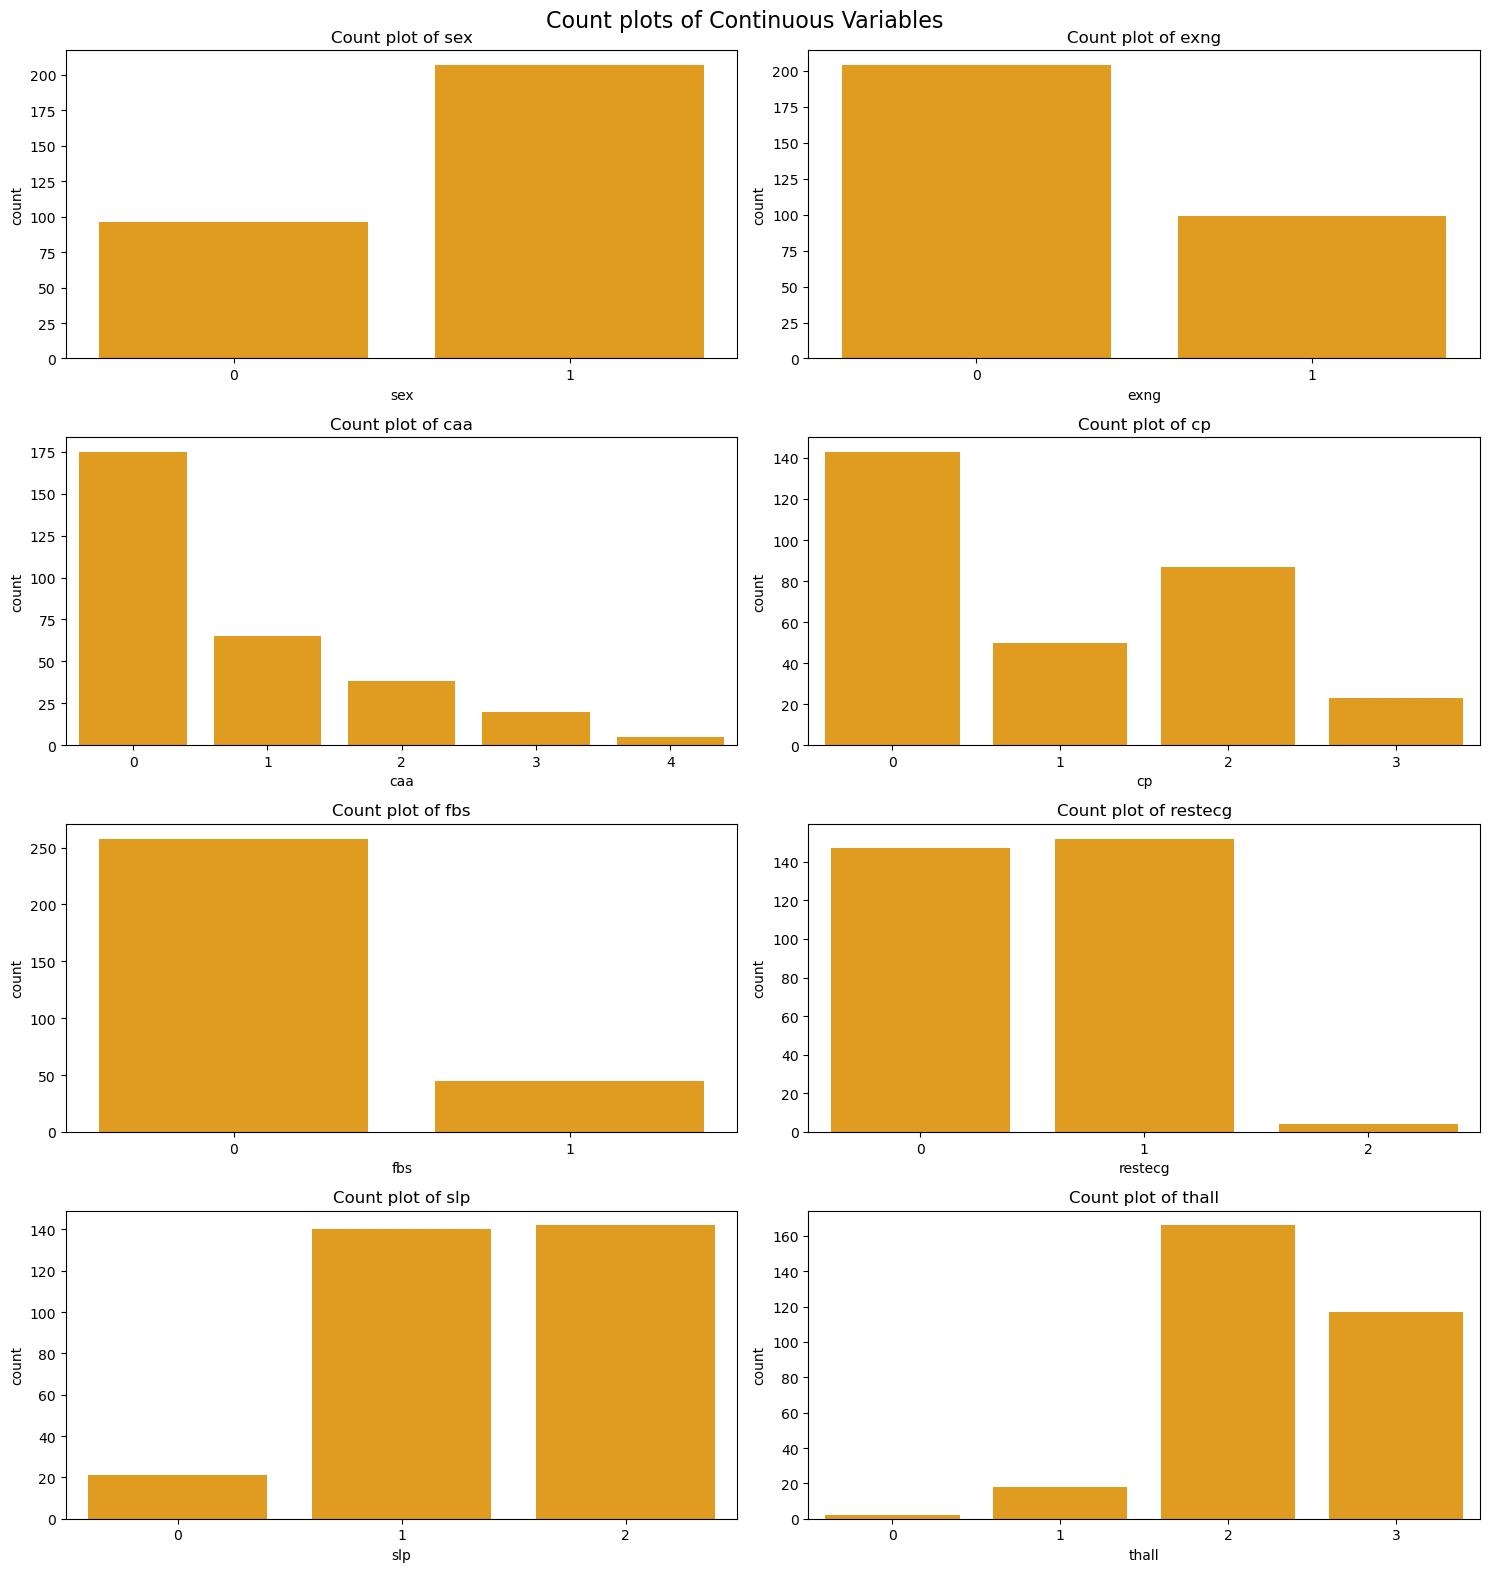

In [10]:
### Count plots for categorical data

check = data[cat_cols].columns.to_list()
num_plots = len(check)
num_plots = len(check)
num_rows = (num_plots + 1) // 2  # Adjusting the number of rows dynamically based on the number of plots
num_cols = 2

fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 16))

for i, column in enumerate(check):
    row = i // num_cols
    col = i % num_cols
    sns.countplot(x=data[column], ax=ax[row, col], color='orange') #specifying the position of each subplot within the grid of subplots
    ax[row, col].set_title(f'Count plot of {column}')

fig.suptitle('Count plots of Continuous Variables', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.tight_layout()
plt.show()


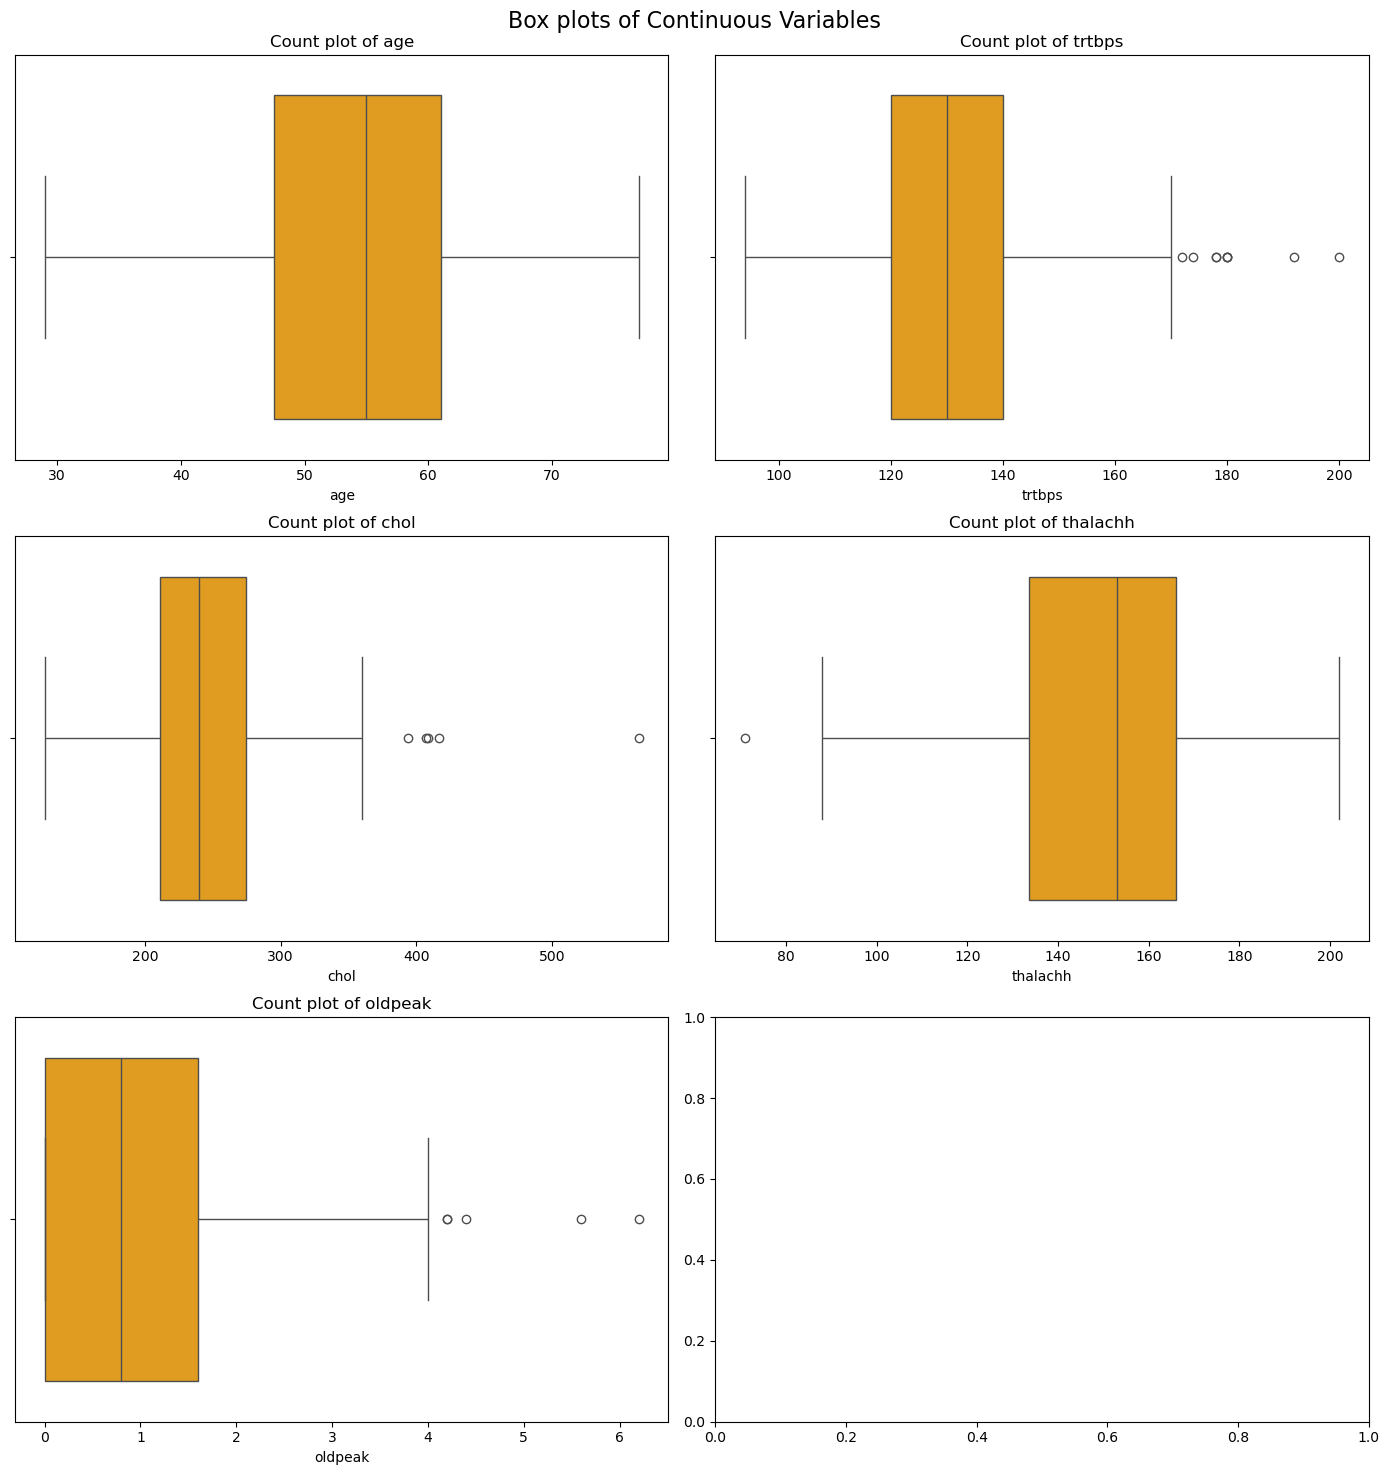

In [11]:
### Box plots for continuous data
check = data[cont_cols].columns.to_list()
num_plots = len(check)
num_plots = len(check)
num_rows = (num_plots + 1) // 2  # Adjusting the number of rows dynamically based on the number of plots
num_cols = 2

fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(14, 15))

for i, column in enumerate(check):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x=data[column], ax=ax[row, col], color='orange') #specifying the position of each subplot within the grid of subplots
    ax[row, col].set_title(f'Count plot of {column}')

plt.tight_layout()
fig.suptitle('Box plots of Continuous Variables', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

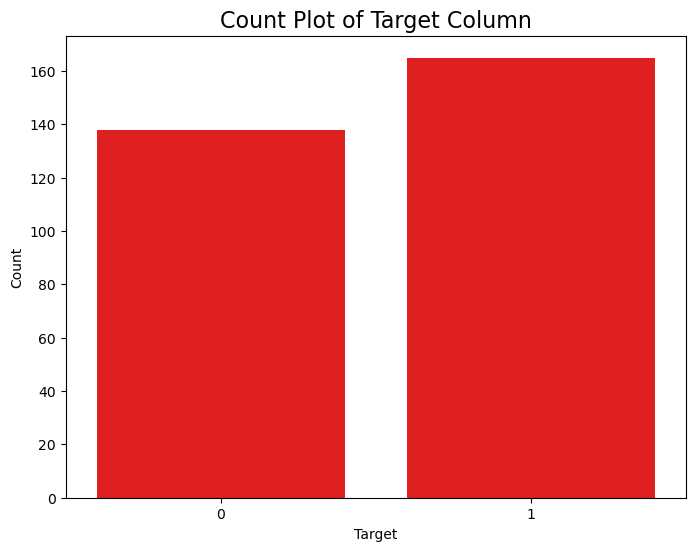

In [12]:
### Count plot of target

fig = plt.figure(figsize=(8,6))
sns.countplot(x=data['output'], color='red')
plt.title('Count Plot of Target Column', fontsize=16)
plt.xlabel('Target')
plt.ylabel('Count')

plt.show()

In [13]:
### Correlation Matrix
data_corr = data[cont_cols].corr().transpose()
data_corr

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


<Axes: >

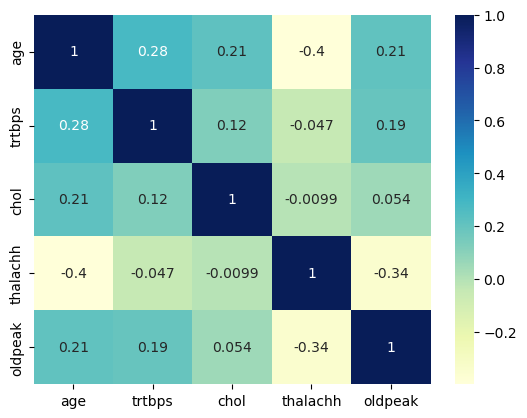

In [14]:
sns.heatmap(data_corr, annot=True,cmap='YlGnBu')

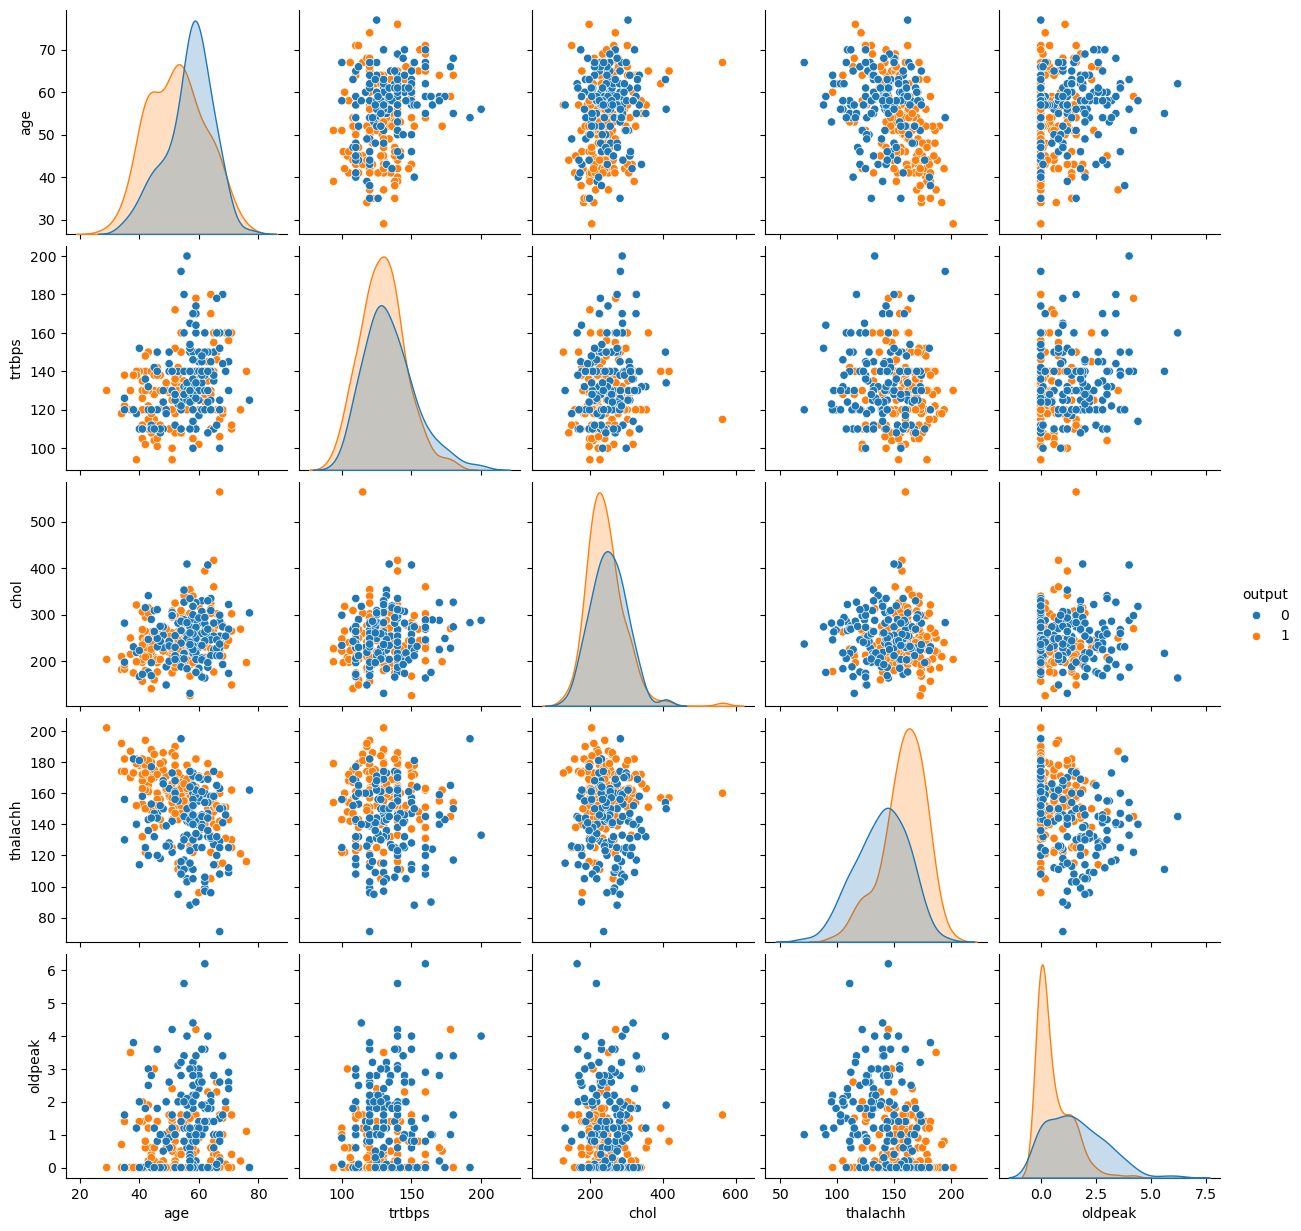

In [15]:
### Pairplot
# Ensure 'output' is treated as a categorical variable with two classes
data['output'] = data['output'].astype('category')
sns.pairplot(data=data[cont_cols + ['output']], hue='output')

#### Conclusion from EDA
1. There are no NaN values in the data.
2. There are certain outliers in all the continuous features.
3. The data consists of more than twice the number of people with sex = 1 than sex = 0.
4. There is no apparent linear correlation between continuous variable according to the heatmap.
5. It is intuitive that elder people might have higher chances of having a heart attack, but according to the distribution plot of age with respect to output, this isn't the case.
6. According to the distribution plot of thalachh with respect to output, people with higher maximum heart rate achieved have higher chances of heart attack.
7. According to the distribution plot of oldpeak with respect to output, people with lower pevious peak achieved have higher chances of heart attack.

## 4. Data Preprocessing <a id="data-preprocessing"></a>


### 4.1 Packages <a id="preprocessing-packages"></a>


In [16]:
# Scaling
### Because there are certain outliers in our data, we will use Robust Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay


# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold

print('Packages imported...')

Packages imported...


### 4.2 Feature Scaling <a id="feature-scaling"></a>


In [17]:
# Features and target variable
X = data.drop(['output'], axis=1)
y = data[['output']]

print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (303, 13)
Shape of y: (303, 1)


In [18]:
# Scaler
scaler = RobustScaler()

# Scaling continuous features
X[cont_cols] = scaler.fit_transform(X[cont_cols])
print('X after scaling: ')
X.head()

X after scaling: 


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.592593,1,3,0.75,-0.110236,1,0,-0.092308,0,0.9375,0,0,1
1,-1.333333,1,2,0.00,0.157480,0,1,1.046154,0,1.6875,0,0,2
2,-1.037037,0,1,0.00,-0.566929,0,0,0.584615,0,0.3750,2,0,2
3,0.074074,1,1,-0.50,-0.062992,0,1,0.769231,0,0.0000,2,0,2
4,0.148148,0,0,-0.50,1.795276,0,1,0.307692,1,-0.1250,2,0,2


### 4.3 Train test split <a id="train-test-split"></a>


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')

Shape of X_train: (242, 13)
Shape of X_test: (61, 13)


## 5. Modeling <a id="modeling"></a>


### Evaluation Metrics

**Accuracy vs Precision vs Recall**
- Accuracy shows how often a classification ML model is correct overall. 
- Precision shows how often an ML model is correct when predicting the target class.
- Recall shows whether an ML model can find all objects of the target class. 

In this high-risk detection case, we will prioritize preventing a dangerous situation, which means that we wouldn't want to miss out any positive cases(heart attack cases). There for we will choose Recall as our main evaluation metric

Recall is defined as the ratio of True Positives (TP) to the sum of True Positives (TP) and False Negatives (FN). We can express this mathematically as:

$$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$



### 5.1 Linear Classifiers <a id="linear-classifiers"></a>


#### 5.1.1 Support Vector Machine <a id="svm"></a>


In [20]:
from statistics import stdev

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [21]:
# Initiate SVC with default hyperparameters
svc = SVC()

# Fit the model 
svc.fit(X_train, y_train)

# Prediction
y_pred = svc.predict(X_test)

# Calculate scores for comparsion
svc_recall = recall_score(y_test, y_pred)
svc_precision = precision_score(y_test, y_pred)
svc_f1 = f1_score(y_test, y_pred)
svc_accuracy = accuracy_score(y_test, y_pred)

# Evaluate the default model using cross-validation with the same cv splitter
score = cross_val_score(svc, X_train, y_train.values.ravel(), cv=cv, scoring='recall')
svc_cv_score = score.mean()
svc_cv_stdev = stdev(score)
print("Cross Validation Recall scores are: {}".format(score))
print(f"Average Cross Validation Recall score: {svc_cv_score:.4f}")
print(f"Cross Validation Recall standard deviation: {svc_cv_stdev:.4f}")

Cross Validation Recall scores are: [0.74074074 0.92592593 0.92592593 0.92307692 1.        ]
Average Cross Validation Recall score: 0.9031
Cross Validation Recall standard deviation: 0.0964


C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [22]:
base_model = [(svc_recall, svc_precision, svc_f1, svc_accuracy, svc_cv_score, svc_cv_stdev)]

svc_score = pd.DataFrame(data = base_model, columns= ['Recall','Precision','F1 Score', 'Accuracy', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
svc_score.insert(0, 'Support Vector Machine', 'Before tuning hyperparameters')

svc_score

,Support Vector Machine,Recall,Precision,F1 Score,Accuracy,Avg CV Recall,Standard Deviation of CV Recall
0,Before tuning hyperparameters,0.90625,0.852941,0.878788,0.868852,0.903134,0.096425


### 5.1.2 Hyperparameters tuning for SVM

**The process of using GridSearchCV to find the best hyperparameters**

1. Split the Dataset: Start by splitting your entire dataset into a training set and a test set.
- Training set: Used for training your models.
- Test set: Held out for final evaluation to simulate unseen data.

2. Grid Search with Cross-Validation:
- Grid Search: This process involves defining a parameter grid and using cross-validation to find the best combination of parameters
- Cross-Validation: Typically, the training set is further split into multiple folds (e.g., 5 folds). For each combination of parameters:
  - Train the model on 𝑘−1 folds (e.g., 80% of the data).
  - Validate the model on the remaining fold (e.g., 20% of the data).
  - This process is repeated 𝑘 times (k-fold cross-validation), each time using a different fold for validation and the rest for training.
- The grid search evaluates each parameter combination across all cross-validation folds and identifies the best parameters based on the chosen metric (e.g., recall).

3. Final Model Selection:
- After the grid search, you have the best parameters identified from cross-validation.
- Train the final model using these best parameters on the entire training set (not just the cross-validation folds).

4. Test on Unseen Data:
- Evaluate the final model on the test set (the data that was held out from the beginning and not used in any part of the training or validation process).
- This evaluation provides an unbiased estimate of the model's performance on new, unseen data.

In [23]:
# Find the best hyperparameters using GridsearchCV

# Instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc = SVC() 

# Declare parameters for hyperparameter tuning 
parameters = [
    {'C': np.arange(1, 10, 1), 'kernel': ['linear']},
    {'C': np.arange(1, 10, 1), 'kernel': ['rbf'], 'gamma': np.linspace(0.01, 1, 10)},
    {'C': np.arange(1, 10, 1), 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': np.linspace(0.01, 1, 10)}
]


grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=1)


grid_search.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 369 candidates, totalling 1845 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                          'kernel': ['linear']},
                         {'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                          'gamma': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                          'kernel': ['rbf']},
                         {'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                          'degree': [2, 3, 4],
                          'gamma': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                          'kernel': ['poly']}],
             scoring='recall', verbose=1)

In [24]:
# print best parameter after tuning 
print('Parameters yielding the best result:',grid_search.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print("Best estimator:", grid_search.best_estimator_) 

# Print the best accuracy score and best parameters
# "best_score_: Mean cross-validated score of the best_estimator"
print(f"Best score: {grid_search.best_score_:.4f}")

Parameters yielding the best result: {'C': 1, 'degree': 3, 'gamma': 0.01, 'kernel': 'poly'}
Best estimator: SVC(C=1, gamma=0.01, kernel='poly')
Best score: 1.0000


In [25]:
# Model score
score = cross_val_score(grid_search, X_train, y_train.values.ravel(), cv=cv, scoring='recall', verbose=0)
tuned_svc_cv_score = score.mean()
tuned_svc_cv_stdev = stdev(score)
print('Cross-Validation Recall scores are: {}'.format(score))
print('Average Cross-Validation Recall score: ', tuned_svc_cv_score)
print('Cross-Validation Recall standard deviation: ', tuned_svc_cv_stdev)

Fitting 5 folds for each of 369 candidates, totalling 1845 fits
Fitting 5 folds for each of 369 candidates, totalling 1845 fits
Fitting 5 folds for each of 369 candidates, totalling 1845 fits
Fitting 5 folds for each of 369 candidates, totalling 1845 fits
Fitting 5 folds for each of 369 candidates, totalling 1845 fits
Cross-Validation Recall scores are: [1. 1. 1. 1. 1.]
Average Cross-Validation Recall score:  1.0
Cross-Validation Recall standard deviation:  0.0


In [26]:
# Prediction
y_pred = grid_search.best_estimator_.predict(X_test)

# printing the test accuracy
print(f"The test recall score of SVM after hyperparameter tuning is: {recall_score(y_test, y_pred):.4f}", )

The test recall score of SVM after hyperparameter tuning is: 1.0000


In [27]:
# Calculate scores for comparsion
tuned_svc_recall= recall_score(y_test, y_pred)
tuned_svc_precision = precision_score(y_test, y_pred)
tuned_svc_f1 = f1_score(y_test, y_pred)
tuned_svc_accuracy = accuracy_score(y_test, y_pred)

In [28]:
tuned_model = [(tuned_svc_recall, tuned_svc_precision, tuned_svc_f1, tuned_svc_accuracy, tuned_svc_cv_score, tuned_svc_cv_stdev)]

tuned_svc_score = pd.DataFrame(data = tuned_model, columns= ['Recall','Precision','F1 Score', 'Accuracy', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
tuned_svc_score.insert(0, 'Support Vector Machine', 'After tuning hyperparameters')

tuned_svc_score

,Support Vector Machine,Recall,Precision,F1 Score,Accuracy,Avg CV Recall,Standard Deviation of CV Recall
0,After tuning hyperparameters,1.0,0.52459,0.688172,0.52459,1.0,0.0


In [29]:
# Final Comparison
predictions = pd.concat([svc_score, tuned_svc_score], ignore_index=True, sort=False)
predictions.sort_values(by=['Avg CV Recall'], ascending=True)

,Support Vector Machine,Recall,Precision,F1 Score,Accuracy,Avg CV Recall,Standard Deviation of CV Recall
0,Before tuning hyperparameters,0.90625,0.852941,0.878788,0.868852,0.903134,0.096425
1,After tuning hyperparameters,1.00000,0.524590,0.688172,0.524590,1.000000,0.000000


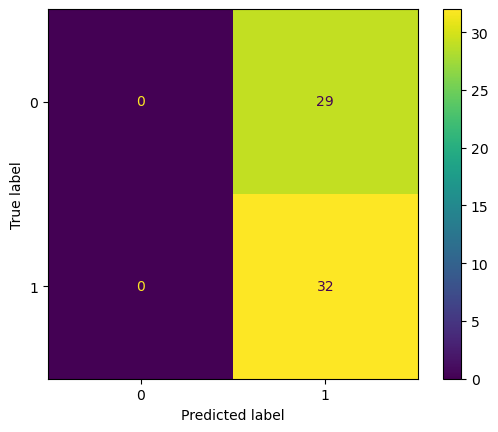

In [30]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [0, 1])
cm_display.plot()
plt.show()

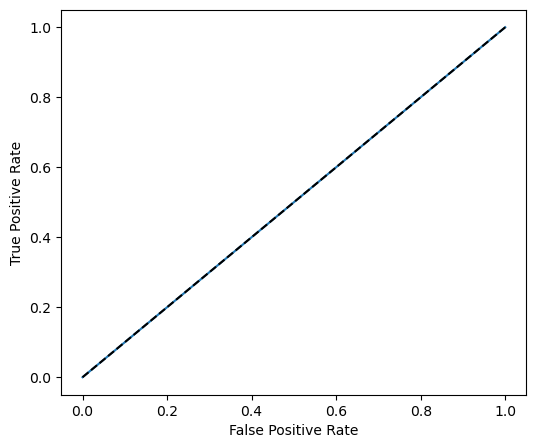

In [31]:
# ROC curve
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,5))
plt.plot(svc_fpr,svc_tpr)
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### 5.1.3 Logistic Regression <a id="logreg"></a>


In [32]:
# Instantiate Logistic Regession Classifier
logreg = LogisticRegression()

# Fitting model
logreg.fit(X_train, y_train)

# Calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# Finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# Printing the test accuracy
print("The test accuracy score of Logistic Regression is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistic Regression is  0.8524590163934426


C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 5.1.4 Hyperparameter tuning for Logistic Regression

In [33]:
# Parameters grid
parameters = {"penalty": ['l1', 'l2']}

# GridSearchCV
grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=1)

# Fiting the model
grid_search.fit(X_train, y_train.values.ravel())



Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fi

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2']}, scoring='recall', verbose=1)

In [34]:
# Print best parameter after tuning 
print('Parameters yielding the best result:',grid_search.best_params_) 
  
# Print how our model looks after hyper-parameter tuning 
print("Best estimator:", grid_search.best_estimator_) 

# Print the best accuracy score and best parameters
print("Best Accuracy:", grid_search.best_score_)


Parameters yielding the best result: {'penalty': 'l2'}
Best estimator: LogisticRegression()
Best Accuracy: 0.856980056980057


In [35]:
# Prediction
y_pred_new = grid_search.best_estimator_.predict(X_test)

# printing the test accuracy
print("The test recall score of Logistic Regressor after hyperparameter tuning is: ", recall_score(y_test, y_pred_new))

The test recall score of Logistic Regressor after hyperparameter tuning is:  0.84375


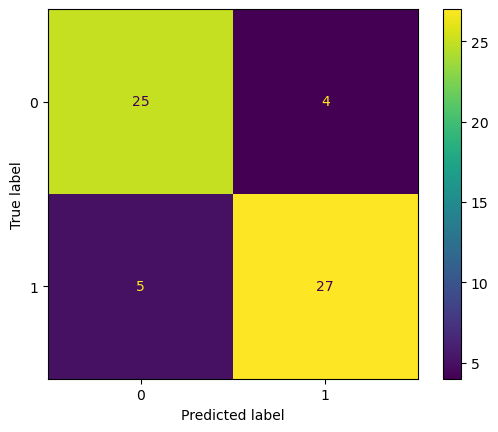

In [36]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [0, 1])
cm_display.plot()
plt.show()

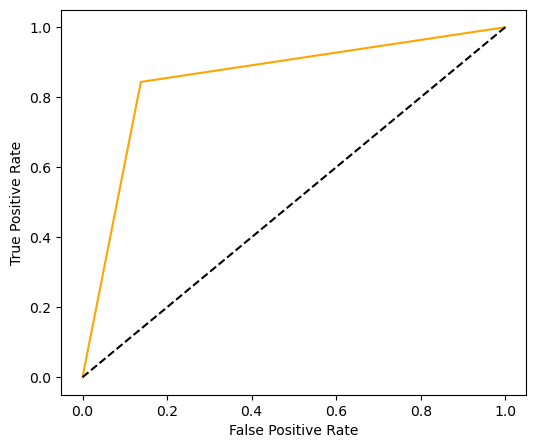

In [37]:
# ROC curve
logreg_fpr, logreg_tpr, threshold = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,5))
plt.plot(logreg_fpr,logreg_tpr, color='orange')
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## 5.2 Tree-based Classifiers <a id="tree-based"></a>


### 5.2.1 Decision Tree <a id="dt"></a>


In [38]:
# Instantiate classifier
dt = DecisionTreeClassifier(random_state = 42)

# Fitting the model
dt.fit(X_train.values, y_train)

# Prediction
y_pred = dt.predict(X_test)

# Print accuracy score
print(f"The test accuracy score of Decision Tree Classifier is {accuracy_score(y_test, y_pred):.4f}")

The test accuracy score of Decision Tree Classifier is 0.7541


### 5.2.2 Random Forest <a id="rf"></a>


In [39]:
# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [40]:
# Instantiate classifier
rf = RandomForestClassifier(random_state = 42)

# Fitting the model
rf.fit(X_train, y_train)

# Prediction
y_pred = rf.predict(X_test)

# Calculate scores for comparsion
rf_recall = recall_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)

# Evaluate the default model using cross-validation with the same cv splitter
score = cross_val_score(rf, X_train, y_train.values.ravel(), cv=cv, scoring='recall')
rf_cv_score = score.mean()
rf_cv_stdev = stdev(score)
print("Cross Validation Recall scores are: {}".format(score))
print(f"Average Cross Validation Recall score: {rf_cv_score:.4f}")
print(f"Cross Validation Recall standard deviation: {rf_cv_stdev:.4f}")

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Cross Validation Recall scores are: [0.66666667 0.85185185 0.88888889 0.80769231 0.92307692]
Average Cross Validation Recall score: 0.8276
Cross Validation Recall standard deviation: 0.0997


In [41]:
base_model = [(rf_recall, rf_precision, rf_f1, rf_accuracy, rf_cv_score, rf_cv_stdev)]

rf_score = pd.DataFrame(data = base_model, columns= ['Recall','Precision','F1 Score', 'Accuracy', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
rf_score.insert(0, 'Random Forest', 'Before tuning hyperparameters')

rf_score

,Random Forest,Recall,Precision,F1 Score,Accuracy,Avg CV Recall,Standard Deviation of CV Recall
0,Before tuning hyperparameters,0.84375,0.84375,0.84375,0.836066,0.827635,0.099695


### 5.2.3 Hyperparameter tunning for Random Forest

In [42]:
# This time, we reduce the parameter space
parameters = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=parameters, cv=cv, n_jobs=-1, scoring='recall')

# Fit the model
grid_search.fit(X_train, y_train)

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='recall')

In [43]:
# print best parameter after tuning 
print('Parameters yielding the best result:',grid_search.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print("Best estimator:", grid_search.best_estimator_) 

# Print the best accuracy score and best parameters
# "best_score_: Mean cross-validated score of the best_estimator"
print("Best Recall:", grid_search.best_score_)

Parameters yielding the best result: {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best estimator: RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                       n_estimators=200)
Best Recall: 0.872934472934473


In [44]:
# Model score
score = cross_val_score(grid_search, X_train, y_train.values.ravel(), cv=cv, scoring='recall', verbose=0)
tuned_rf_cv_score = score.mean()
tuned_rf_cv_stdev = stdev(score)
print('Cross-Validation Recall scores are: {}'.format(score))
print('Average Cross-Validation Recall score: ', tuned_rf_cv_score)
print('Cross-Validation Recall standard deviation: ', tuned_rf_cv_stdev)

Cross-Validation Recall scores are: [0.7037037  0.88888889 0.88888889 0.84615385 0.92307692]
Average Cross-Validation Recall score:  0.8501424501424502
Cross-Validation Recall standard deviation:  0.08628763786548714


In [45]:
# Prediction
y_pred = grid_search.best_estimator_.predict(X_test)

# printing the test accuracy
print("The test recall score of Random Forest after hyperparameter tuning is: ", recall_score(y_test, y_pred))

The test recall score of Random Forest after hyperparameter tuning is:  0.90625


In [46]:
# Calculate scores for comparsion
tuned_rf_recall = recall_score(y_test, y_pred)
tuned_rf_precision = precision_score(y_test, y_pred)
tuned_rf_f1 = f1_score(y_test, y_pred)
tuned_rf_accuracy = accuracy_score(y_test, y_pred)

In [47]:
tuned_model = [(tuned_rf_recall, tuned_rf_precision, tuned_rf_f1, tuned_rf_accuracy, tuned_rf_cv_score, tuned_rf_cv_stdev)]

tuned_rf_score = pd.DataFrame(data = tuned_model, columns= ['Recall','Precision','F1 Score', 'Accuracy', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
tuned_rf_score.insert(0, 'Random Forest', 'After tuning hyperparameters')

# Final Comparison
predictions = pd.concat([rf_score, tuned_rf_score], ignore_index=True, sort=False)
predictions.sort_values(by=['Avg CV Recall'], ascending=True)

,Random Forest,Recall,Precision,F1 Score,Accuracy,Avg CV Recall,Standard Deviation of CV Recall
0,Before tuning hyperparameters,0.84375,0.843750,0.843750,0.836066,0.827635,0.099695
1,After tuning hyperparameters,0.90625,0.852941,0.878788,0.868852,0.850142,0.086288


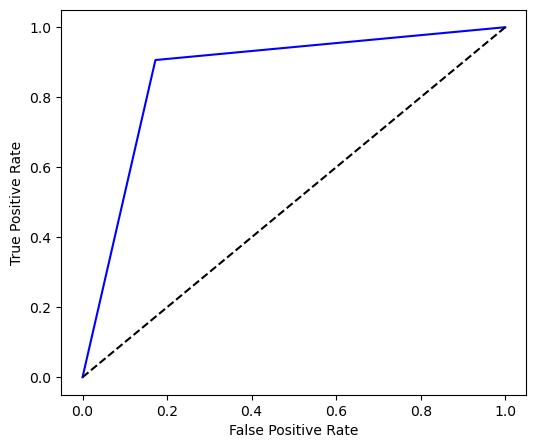

In [48]:
# ROC curve
rf_fpr, rf_tpr, threshold = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,5))
plt.plot(rf_fpr,rf_tpr, color='blue')
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### 5.2.4 AdaBoost Classifier <a id="adaboost"></a>


In [49]:
# AdaBoost instance
adaboost = AdaBoostClassifier(n_estimators=150, learning_rate=1)

# Fitting the model
adaboost.fit(X_train, y_train)

# Prediction
y_pred = adaboost.predict(X_test)


# Calculate scores for comparsion
ada_recall = recall_score(y_test, y_pred)
ada_precision = precision_score(y_test, y_pred)
ada_f1 = f1_score(y_test, y_pred)
ada_accuracy = accuracy_score(y_test, y_pred)


# Evaluate the default model using cross-validation with the same cv splitter
score = cross_val_score(adaboost, X_train, y_train.values.ravel(), cv=cv, scoring='recall')
ada_cv_score = score.mean()
ada_cv_stdev = stdev(score)
print("Cross Validation Recall scores are: {}".format(score))
print(f"Average Cross Validation Recall score: {ada_cv_score:.4f}")
print(f"Cross Validation Recall standard deviation: {ada_cv_stdev:.4f}")

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross Validation Recall scores are: [0.77777778 0.81481481 0.81481481 0.84615385 0.88461538]
Average Cross Validation Recall score: 0.8276
Cross Validation Recall standard deviation: 0.0400


In [50]:
# Convert model scores to dataframe
base_model = [(ada_recall, ada_precision, ada_f1, ada_accuracy, ada_cv_score, ada_cv_stdev)]

ada_score = pd.DataFrame(data = base_model, columns= ['Recall','Precision','F1 Score', 'Accuracy', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
ada_score.insert(0, 'AdaBoost', 'Before tuning hyperparameters')

ada_score

,AdaBoost,Recall,Precision,F1 Score,Accuracy,Avg CV Recall,Standard Deviation of CV Recall
0,Before tuning hyperparameters,0.6875,0.814815,0.745763,0.754098,0.827635,0.040013


### 5.2.5 Hyperparameter tuning for AdaBoost

In [51]:
# Define parameter grid
parameters= {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=adaboost, param_grid=parameters, cv=cv, scoring='recall')

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(learning_rate=1, n_estimators=150),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='recall')

In [52]:
# Print best parameter after tuning 
print('Parameters yielding the best result:',grid_search.best_params_) 
  
# Print how our model looks after hyper-parameter tuning 
print("Best estimator:", grid_search.best_estimator_) 

# Print the best accuracy score and best parameters
print("Best recall:", grid_search.best_score_)


Parameters yielding the best result: {'learning_rate': 0.01, 'n_estimators': 200}
Best estimator: AdaBoostClassifier(learning_rate=0.01, n_estimators=200)
Best recall: 0.8954415954415955


In [53]:
# Model score
score = cross_val_score(grid_search, X_train, y_train.values.ravel(), cv=cv, scoring='recall', verbose=0)
tuned_ada_cv_score = score.mean()
tuned_ada_cv_stdev = stdev(score)
print('Cross-Validation Recall scores are: {}'.format(score))
print('Average Cross-Validation Recall score: ', tuned_ada_cv_score)
print('Cross-Validation Recall standard deviation: ', tuned_ada_cv_stdev)

Cross-Validation Recall scores are: [0.77777778 0.88888889 0.92592593 0.92307692 0.96153846]
Average Cross-Validation Recall score:  0.8954415954415955
Cross-Validation Recall standard deviation:  0.07062137317556004


In [54]:
# Prediction
y_pred = grid_search.best_estimator_.predict(X_test)

# printing the test accuracy
print("The test recall score of Random Forest after hyperparameter tuning is: ", recall_score(y_test, y_pred))

The test recall score of Random Forest after hyperparameter tuning is:  0.875


In [55]:
# Calculate scores for comparsion
tuned_ada_recall = recall_score(y_test, y_pred)
tuned_ada_precision = precision_score(y_test, y_pred)
tuned_ada_f1 = f1_score(y_test, y_pred)
tuned_ada_accuracy = accuracy_score(y_test, y_pred)

In [56]:
tuned_model = [(tuned_ada_recall, tuned_ada_precision, tuned_ada_f1, tuned_ada_accuracy, tuned_ada_cv_score, tuned_ada_cv_stdev)]

tuned_ada_score = pd.DataFrame(data = tuned_model, columns= ['Recall','Precision','F1 Score', 'Accuracy', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
tuned_ada_score.insert(0, 'AdaBoost', 'After tuning hyperparameters')

# Final Comparison
predictions = pd.concat([ada_score, tuned_ada_score], ignore_index=True, sort=False)
predictions.sort_values(by=['Avg CV Recall'], ascending=True)

,AdaBoost,Recall,Precision,F1 Score,Accuracy,Avg CV Recall,Standard Deviation of CV Recall
0,Before tuning hyperparameters,0.6875,0.814815,0.745763,0.754098,0.827635,0.040013
1,After tuning hyperparameters,0.8750,0.848485,0.861538,0.852459,0.895442,0.070621


## 6. Save Model <a id="dave-model"></a>


*Random Forest gives us the best results overall, so we will save that model*

In [28]:
# We test the final model one more time
heartattack_predictor = RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=4, n_estimators=200)

# Fitting the model
heartattack_predictor.fit(X_train, y_train.values.ravel())

# Prediction
y_pred = heartattack_predictor.predict(X_test)

# Printing the test recall
print("The test recall score of Random Forest after hyperparameter tuning is: ", recall_score(y_test, y_pred))

The test recall score of Random Forest after hyperparameter tuning is:  0.90625


Text(0.5, 0.98, 'Visualization of an Individual Tree')

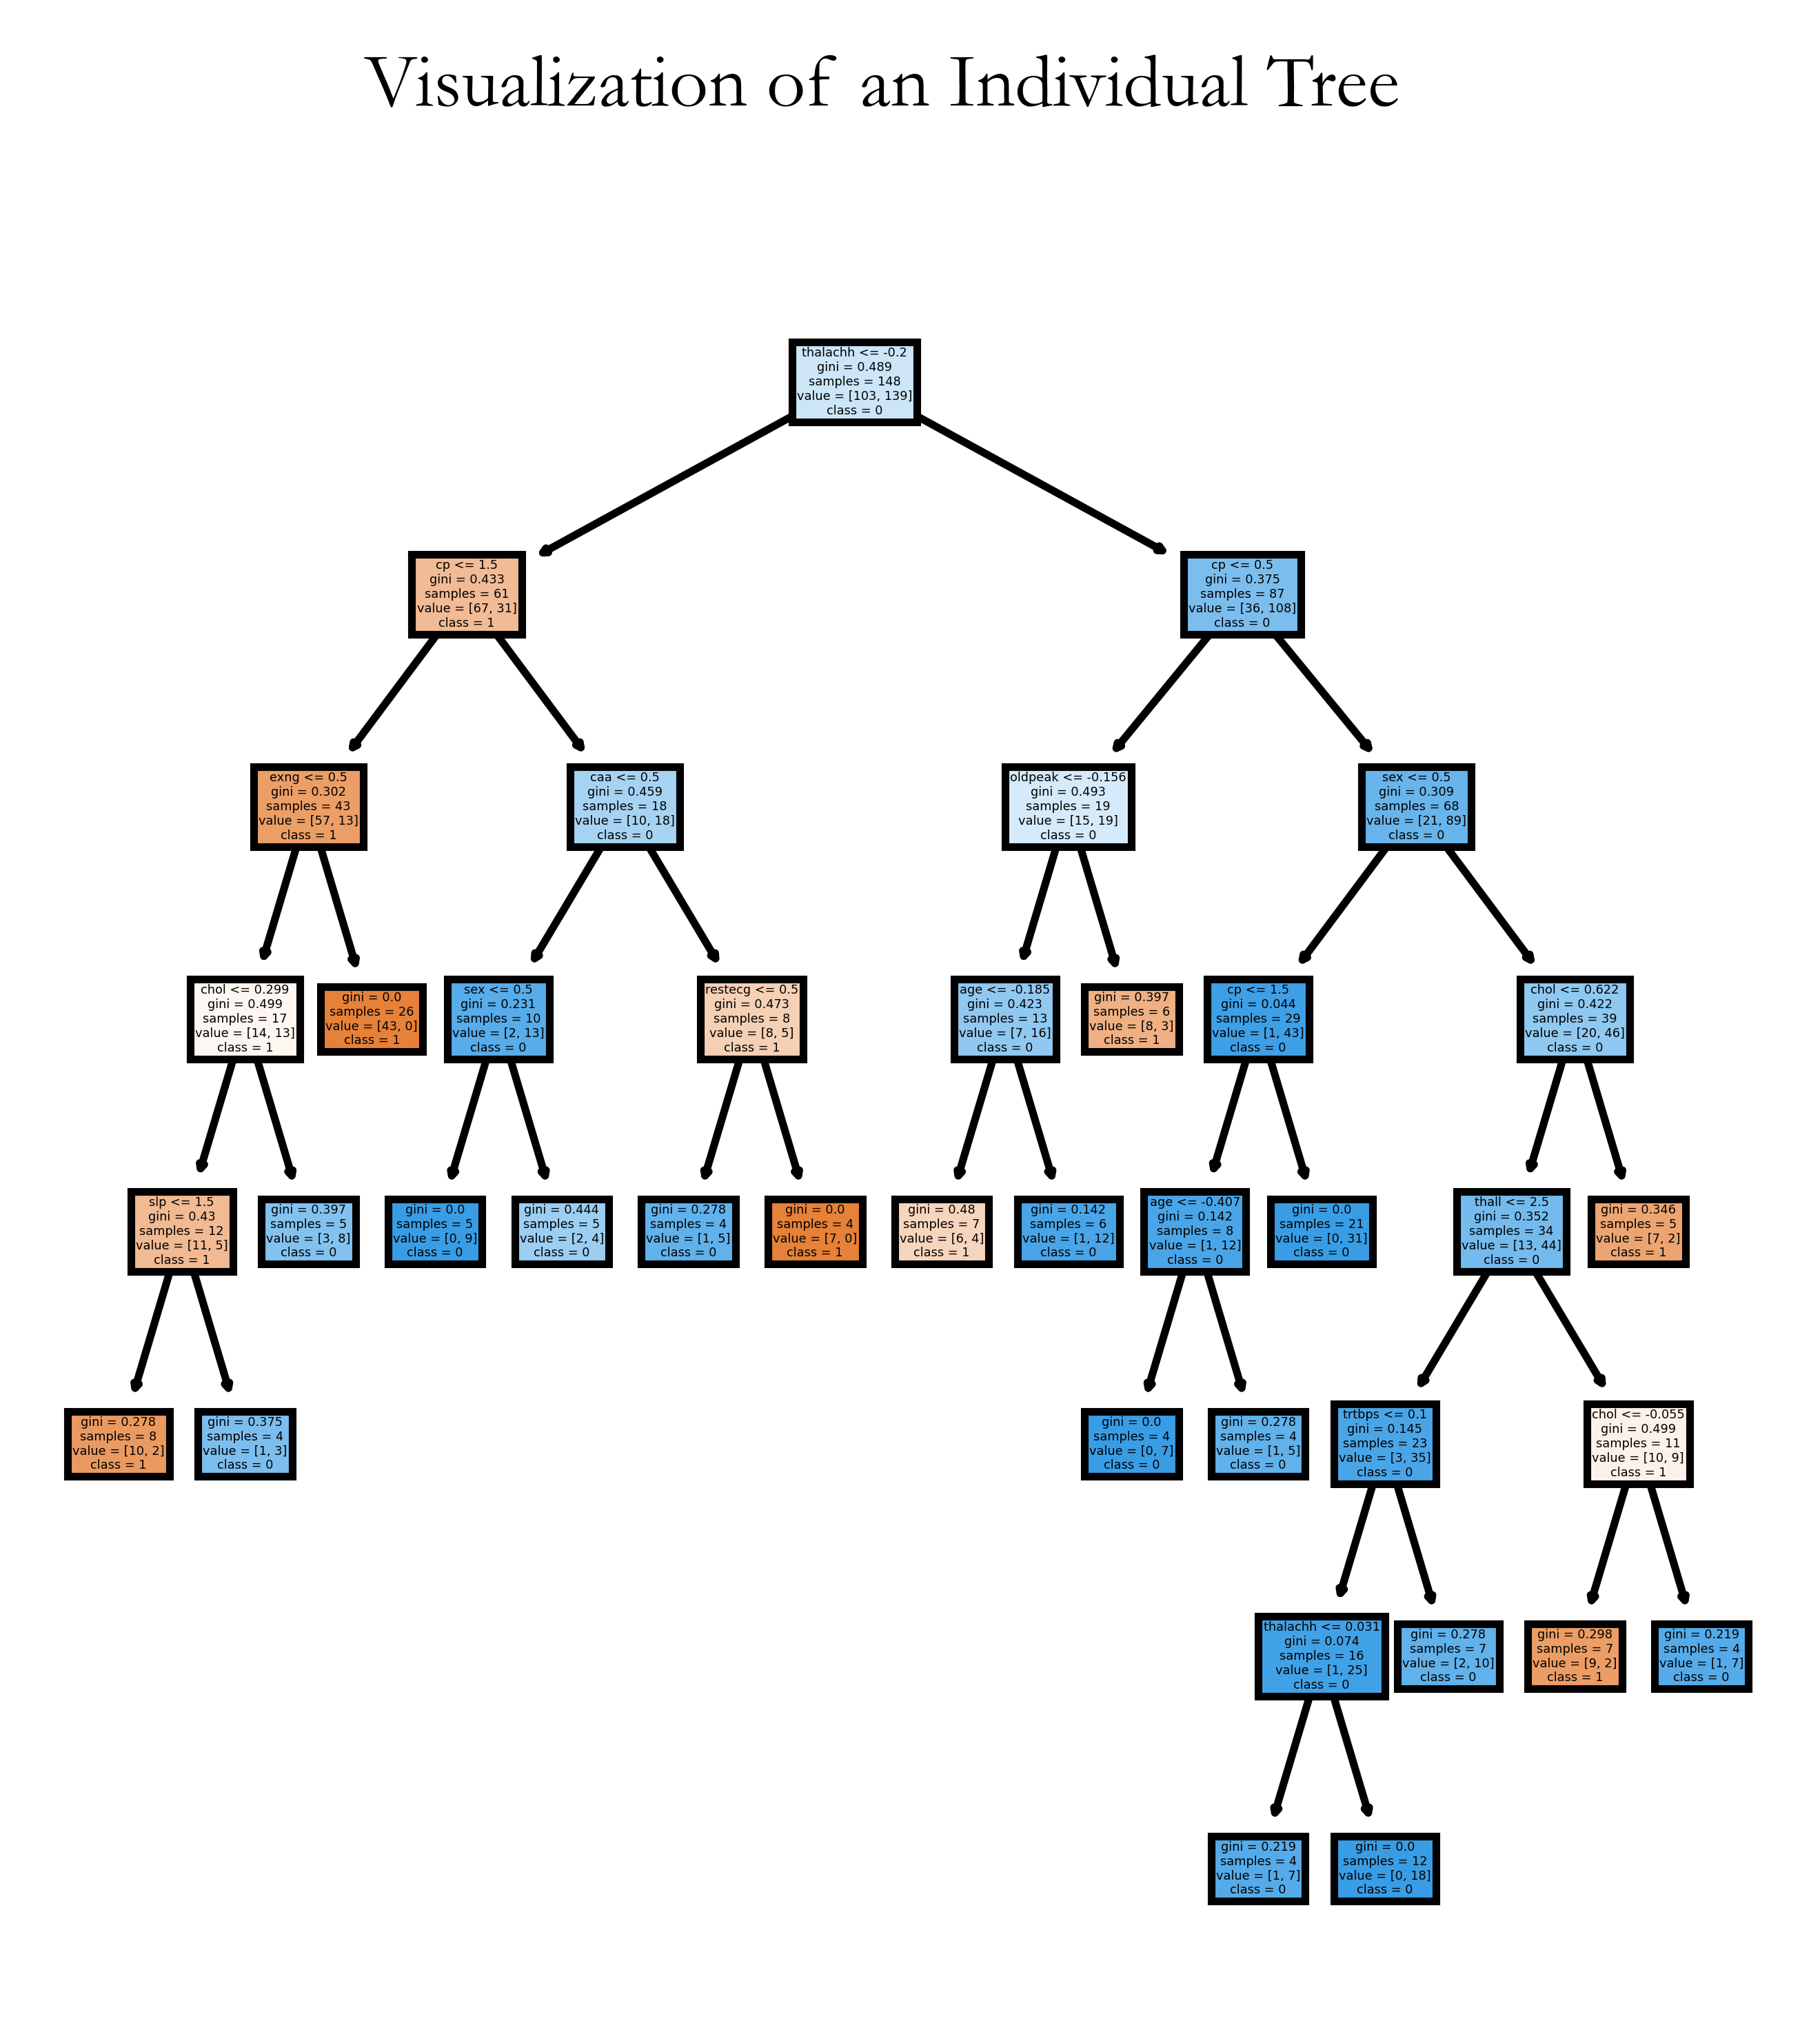

In [72]:
from sklearn import tree

# Feature names and class names
fn = X_train.columns  # or data.columns[:-1] if features are named this way
cn = cn = y_train.squeeze().unique().astype(str)  # list of all classes, not column's name

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(heartattack_predictor.estimators_[0],
               feature_names=fn,
               class_names=cn,
               filled=True)
fig.suptitle('Visualization of an Individual Tree', fontsize=10, font='Garamond')

Text(0.5, 0.98, 'Visualization of 2 Decision Trees')

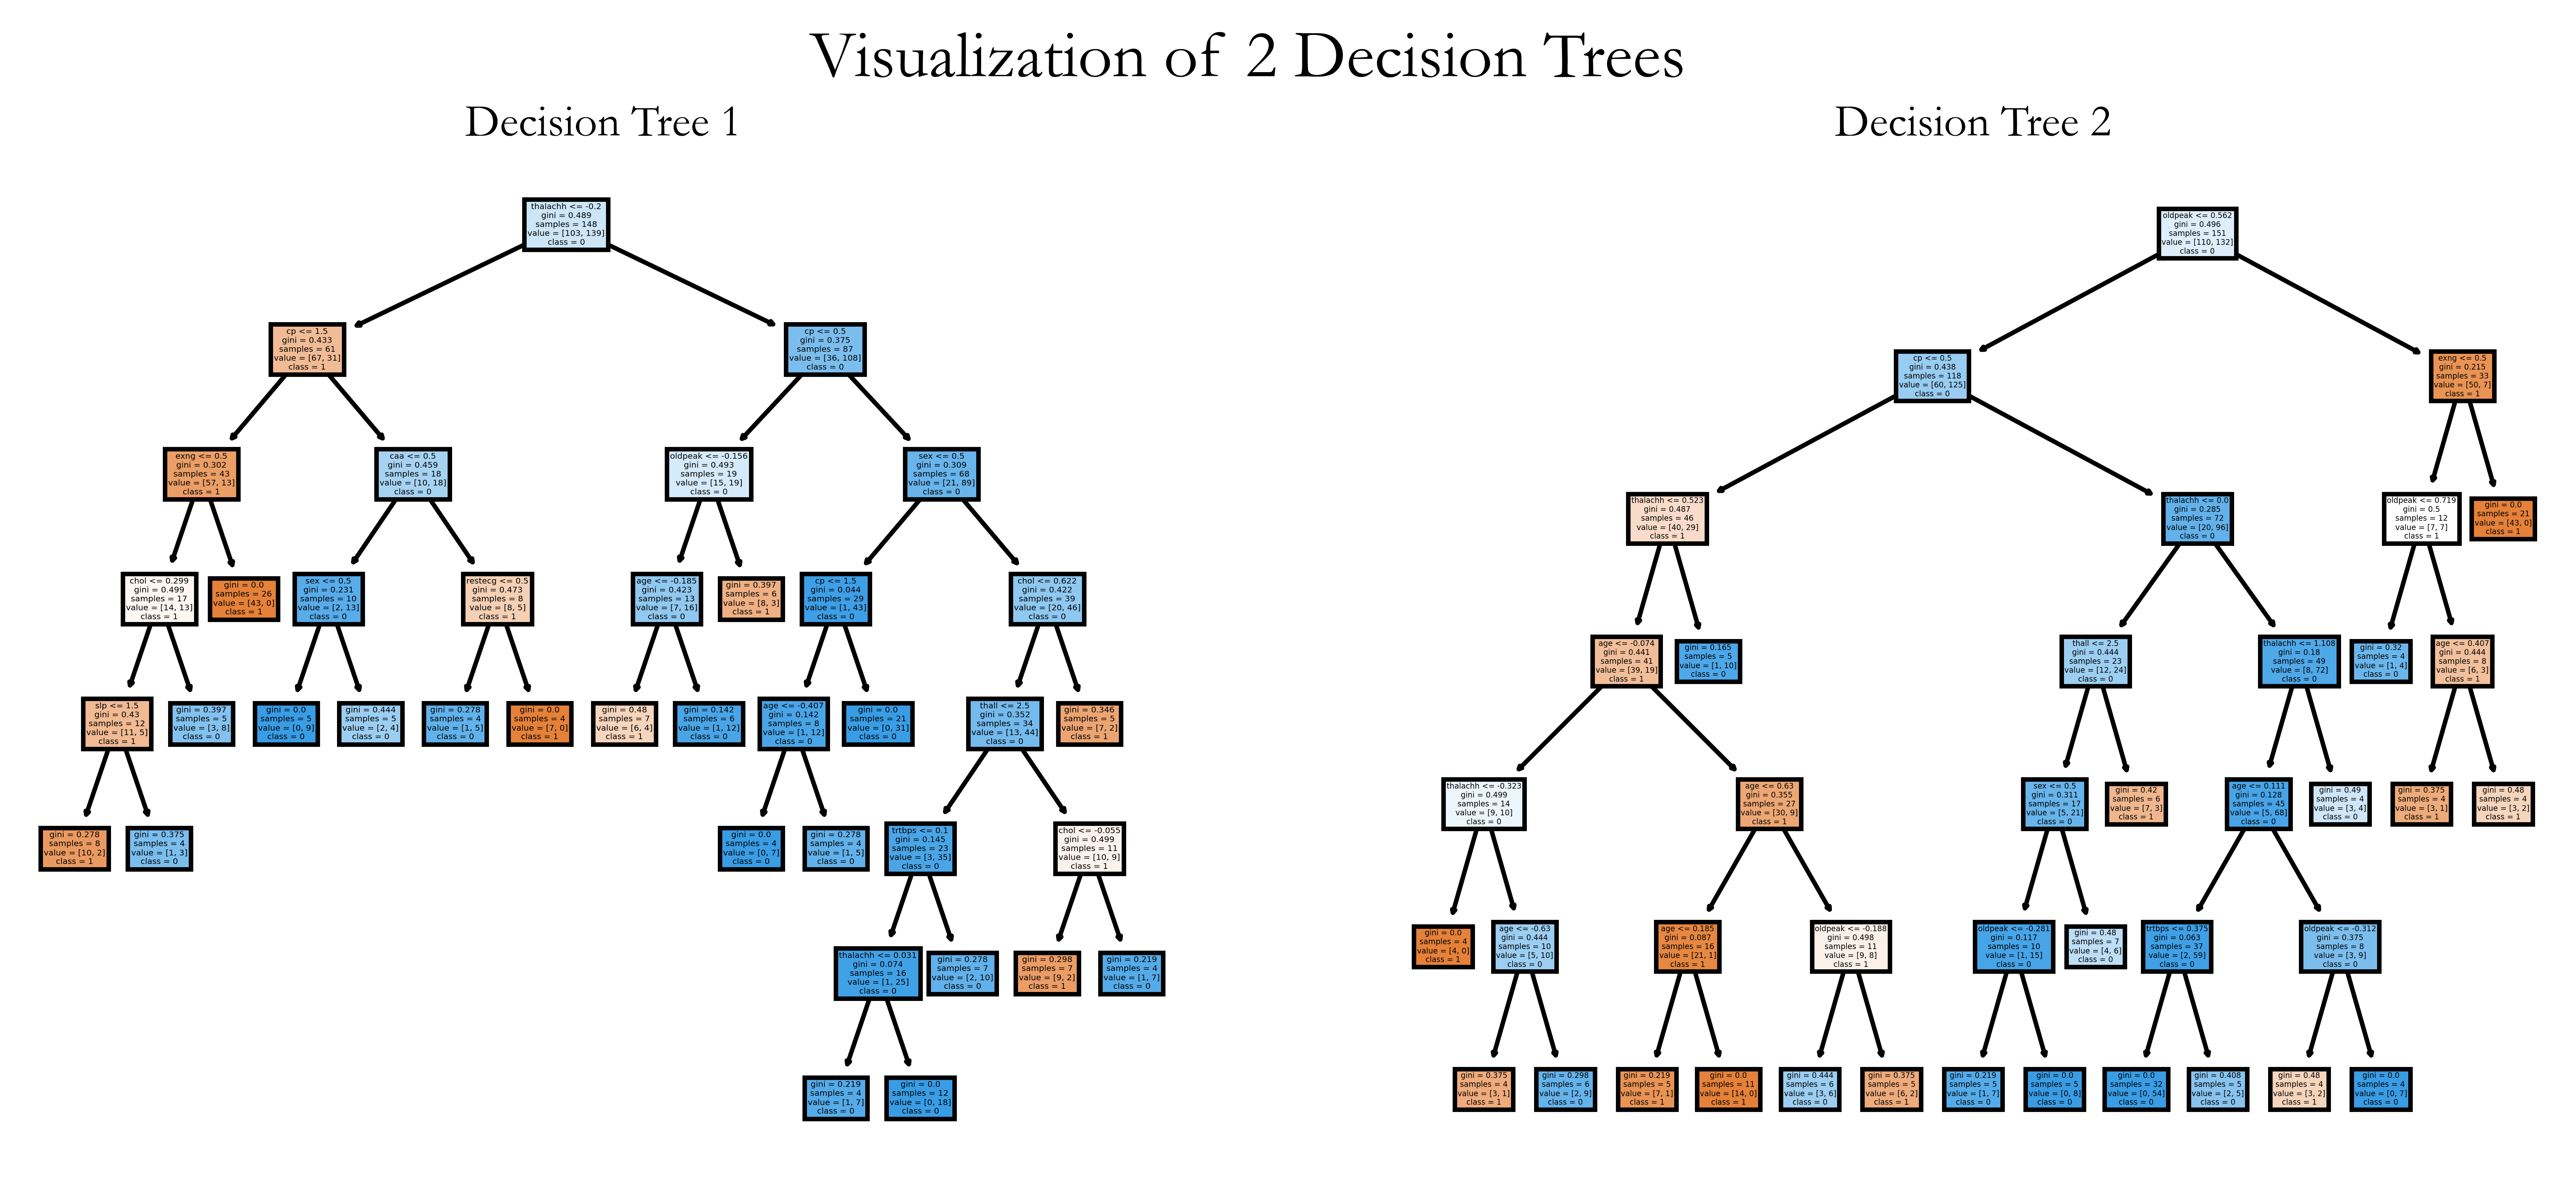

In [76]:
from sklearn import tree

# Feature names and class names
fn = X_train.columns  # or data.columns[:-1] if features are named this way
cn = cn = y_train.squeeze().unique().astype(str)  # list of all classes, not column's name

# Number of trees to visualize
num_trees = 2

fig, axes = plt.subplots(nrows = 1,ncols = 2 , figsize = (10,4), dpi=800)

for i in range(num_trees):
    ax = axes[i]
    tree.plot_tree(heartattack_predictor.estimators_[i],
                feature_names=fn,
                class_names=cn,
                filled=True,
                ax=ax)
    
    ax.set_title(f'Decision Tree {i+1}', fontsize=10, font='Garamond')
    
    
fig.suptitle(f'Visualization of {num_trees} Decision Trees', fontsize=15, font='Garamond')

In [23]:
## Save Model
import pickle

filename = 'heartattack_predictor.sav'
pickle.dump(heartattack_predictor,open(filename,'wb'))